In [3]:
MERCHANDISE_RATE = 'LINKUSDT'
DAYS = 60
HOUR_OBSERVE = 7

_________________________________________log query_________________________________________
SELECT * FROM DailyTradingJournal_development.candlesticks candlesticks INNER JOIN DailyTradingJournal_development.hour_analytics ON candlesticks.id = hour_analytics.candlestick_id WHERE candlesticks.time_type = 4 AND candlesticks.merchandise_rate_id = 42 ORDER BY candlesticks.date DESC lIMIT 1440;


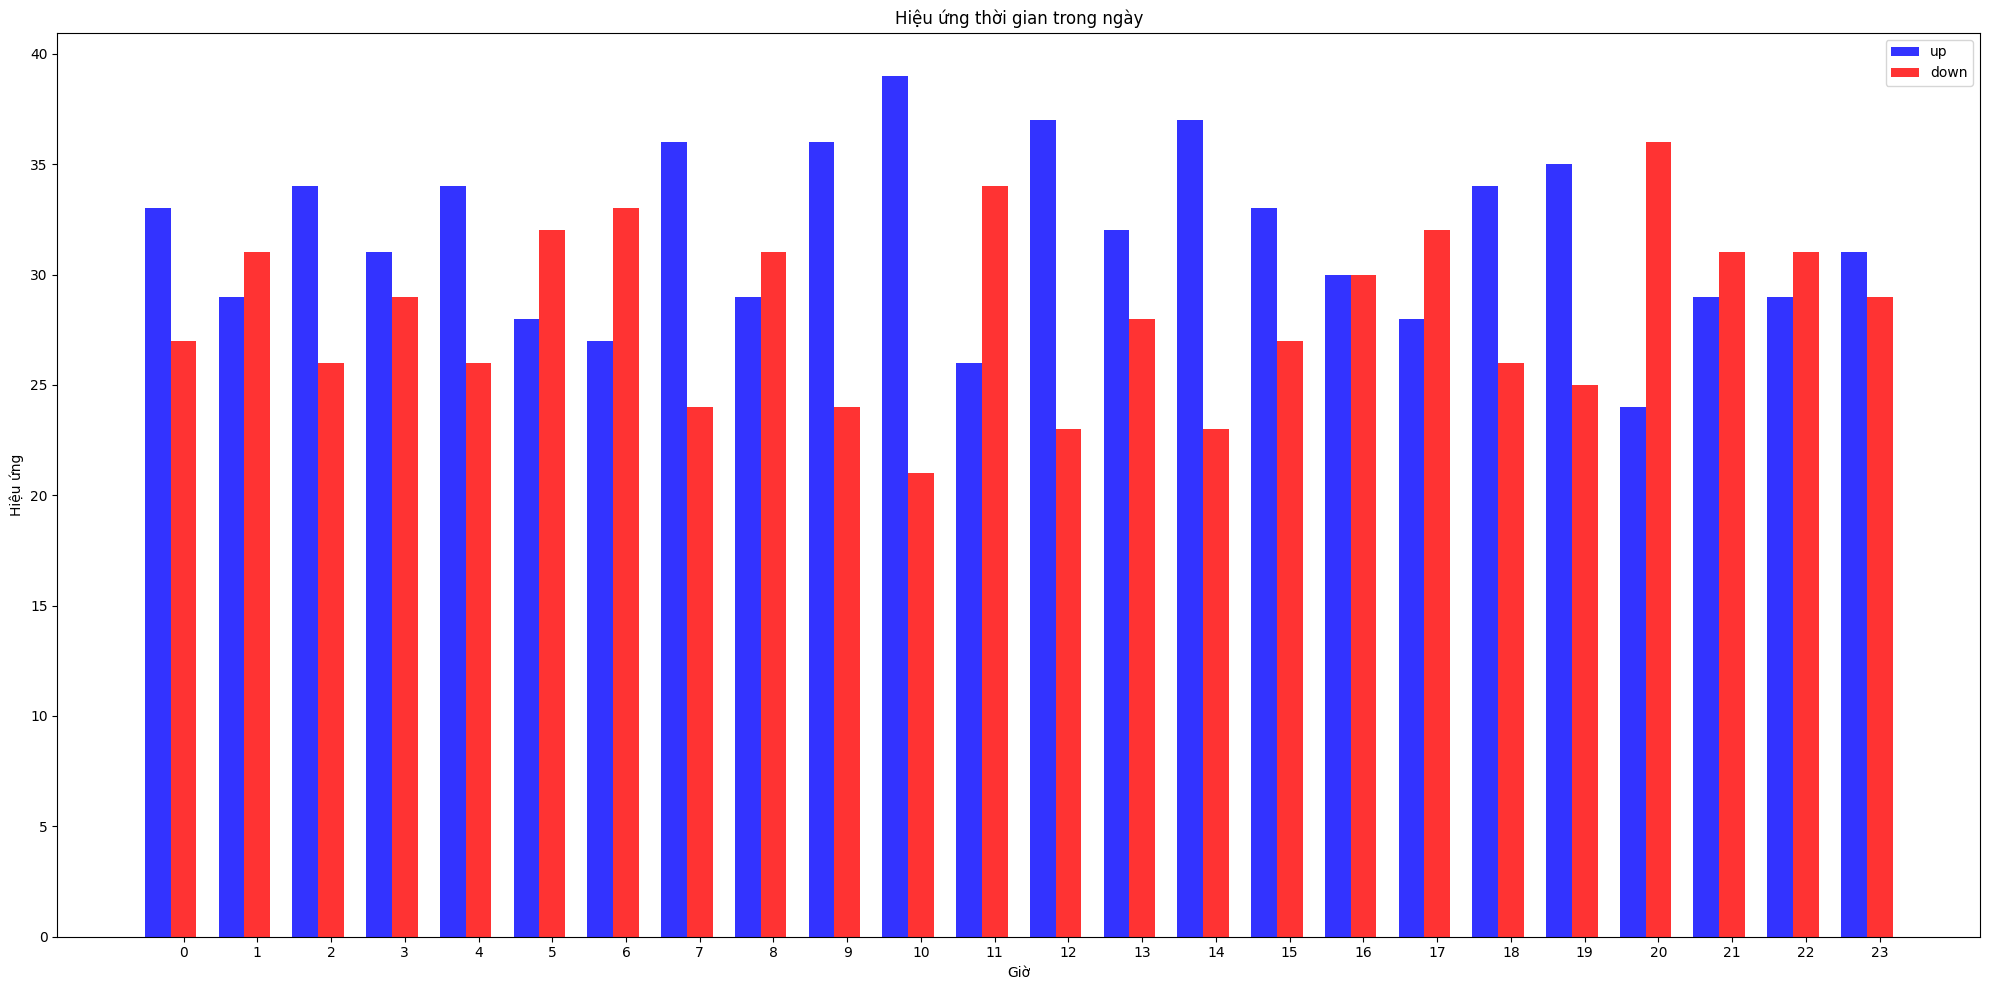

In [4]:
%matplotlib inline

from services.report_service import hour_analytic

plt = hour_analytic(MERCHANDISE_RATE, DAYS, HOUR_OBSERVE)
plt.show()

In [ ]:
from models.candlestick import Candlestick
from helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from models.merchandise_rate import MerchandiseRate
from helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LINKUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*60, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')
# candlestick_day = Candlestick(merchandise_rate_id, 'day', 100, "DESC")
hour_observe = 8

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
# data_prices['type_21'] = candlestick_type_by_hour(data_prices, 21)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 7)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 12)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 13)

data_prices['type_continuous'] = type_continuous(data_prices)

# data_prices['until_now'] = until_now_type(data_prices)



bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

In [ ]:
models.candlestick import Candlestick
from helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from models.merchandise_rate import MerchandiseRate
from helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LINKUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*60, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')
# candlestick_day = Candlestick(merchandise_rate_id, 'day', 100, "DESC")
hour_observe = 8

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
# data_prices['type_21'] = candlestick_type_by_hour(data_prices, 21)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 7)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 12)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 13)

data_prices['type_continuous'] = type_continuous(data_prices)

# data_prices['until_now'] = until_now_type(data_prices)



bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

In [ ]:
import sys
import os
print(sys.path)
print(os.environ["PYTHONPATH"])